In [658]:
import numpy as np
import math
import random
import copy


class Node(object):
    """ 
    Useful for the opinion network.
    """
    def __init__(self, value = 0, edges = []):
        self.value = value
        self.edges = edges

class Edge(object):
    def __init__(self, fnode, tnode, value):
        self.fnode = fnode
        self.tnode = tnode
        self.value = value

In [685]:
import numpy as np
import math
import random
import copy

#Create three possibilities to represent graph?
#TODO: create possibility to give nodes names? or just number-name dict?
class Graph(object):
    """
    Input can be as a matrix, list of edges as tuples, dictionary of connections between nodes
    """
    def __init__(self, matrix = [], nnodes = 1, nodes = [], \
                 edges = [], nodevalues = [], edgevalues = [], nodedict = {}):
        if matrix != []:
            self.matrix = matrix
            self.nnodes = matrix.shape[0]
            self.matrix_to_edgelist()
            self.nodedict = self.matrix_to_nodedict()
            self.nodes = range(nnodes)
        elif nodes == []:
            self.edges = edges
            self.nnodes = nnodes
            if edgevalues == []:
                edgevalues = [1] * len(self.edges)
            self.edgedict = dict(zip(self.edges, edgevalues))
            self.matrix = np.zeros((nnodes,nnodes))
            self.edgelist_to_matrix()
            self.nodedict = self.matrix_to_nodedict()
            self.nodes = range(nnodes)
        if nodedict != {}:
            0
            
    def edgelist_to_matrix(self):
        #Convert the list of tuples representing edges to a matrix representation of the graph.
        self.matrix = np.zeros((self.nnodes,self.nnodes))
        for edge in self.edges:
            self.matrix[edge[0], edge[1]] = self.edgedict[edge]
            
    def matrix_to_edgelist(self):
        ind = np.nonzero(self.matrix)
        self.edges =  zip(ind[0], ind[1])
        
    def matrix_to_nodedict(self):
        nodedict = {}
        for i in range(self.nnodes):
            ind = np.nonzero(self.matrix[i,:])[0].tolist()
            ind.extend(np.nonzero(self.matrix[:,i])[0].tolist())
            nodedict[i] = ind
        return nodedict
        
        
    def add_edge(self):
        0
        
    def neighbours(self, node):
        0
        
    def find_path(self, start, end, path=[]):
        assert start in self.nodes, "Start is not a node in the graph"
        assert end in self.nodes, "End is not a node in the graph"
        path = path + [start]
        if start == end:
            return path
        for node in self.nodedict[start]:
            if node not in path:
                newpath = self.find_path(node, end, path)
                if newpath: 
                    return newpath
        return None
    
    def find_all_paths(self, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        paths = []
        for node in self.nodedict[start]:
            if node not in path:
                newpaths = self.find_all_paths(node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths 
    
    def find_shortest_path(self, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        shortest = None
        for node in self.nodedict[start]:
            if node not in path:
                newpath = self.find_shortest_path(node, end, path)
                if newpath:
                    if not shortest or len(newpath) < len(shortest):
                        shortest = newpath
        return shortest
        
    def diameter(self):
        """ calculates the diameter of the graph """
        pairs = [ (i,j) for i in range(self.nnodes-1) for j in range(i+1, self.nnodes)]
        shortest_paths = []
        for (start,end) in pairs:
            paths = self.find_all_paths(start,end)
            shortest = sorted(paths, key=len)[0]
            shortest_paths.append(shortest)
        diameter = len(shortest_paths[-1])
        return diameter
  

#Creating different graphs
def create_erdos(n = 1, p = 1.):
    # n Number of Nodes, p Choice to get edge
    # only upper triangular entries
    matrix = np.random.rand(n,n) < p
                    
    #set diagonal and lower triangular entries to zero
    matrix = np.triu(matrix, 1)
            
    return Graph(matrix = matrix, nnodes = n)

def create_watts(n = 1, p = 0.1):
    #create list of edges
    #would be an offdiagonal matrix
    init_edge_list = []
    for i in range(n-1):
        init_edge_list.append((i,i+1))
    init_edge_list.append((0,n-1))
    #G = Graph(nnodes = n, edges = init_edge_list)
    #TG = nx.Graph(G.matrix)
    #draw(TG, pos=nx.spring_layout(TG))
    
    new_edge_list = []
    elist = copy.deepcopy(init_edge_list)
    for edge in init_edge_list:
        if random.random() < p:
            new_edge = edge
            #create new edge until a non-existent is found
            while new_edge in elist or new_edge in new_edge_list or new_edge == (edge[0], edge[0])\
            or (new_edge[1], new_edge[0]) in elist or (new_edge[1], new_edge[0]) in new_edge_list:
                new_edge = (edge[0], random.randint(0, n-1))
            elist.remove(edge)
            #set edges (small number, great number)
            if new_edge[0] > new_edge[1]:
                new_edge = (new_edge[1], new_edge[0])
            new_edge_list.append(new_edge)
        else:
            new_edge_list.append(edge)
            
    return  Graph(nnodes = n, edges = new_edge_list)
    
    
    
def create_barabasi(n, n_0):
    assert n_0 + 1 < n, "%n should be greater than n_0+1"
    matrix = np.zeros((n,n))
    #connect first node to 2,3...,n_0+1
    matrix[0,1:n_0+1] = 1
    #connect (n_0+2)th to 2,3...,n_0+1  (still not important which)
    matrix[1:n_0+1, n_0+1] = 1
    for new in range(n_0+2, n):
        nodes = range(n)
        nodes.remove(new)
        probs = list(matrix.sum(axis=1)+matrix.sum(axis=0))
        probs.pop(new)
        probs = probs/sum(probs)
        ind = numpy.random.choice(nodes, size=n_0, replace=False, p=probs)
        matrix[ind, new] = 1
    return Graph(matrix = matrix)

In [694]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  

###Check Erdos-Renyi Graph
G = create_erdos(8, 0.5)
#TG = nx.Graph(G.matrix)
#draw(TG, pos=nx.spring_layout(TG))

#G.find_path(0,4)
#G.find_all_paths(5,4)
#G.find_shortest_path(3,7)
#print G.diameter()


###Check Watts Graph
#G = create_watts(10, 0.5)
#TG = nx.Graph(G.matrix)
#draw(TG, pos=nx.spring_layout(TG))

#G.find_path(0,9)
#G.find_all_paths(5,4)
#G.find_shortest_path(3,7)
#print G.diameter()

### Check Barabasi Graph
#G = create_barabasi(20, 1)
#TG = nx.Graph(G.matrix)
#draw(TG, pos=nx.spring_layout(TG))

#G.matrix_to_nodedict()
#G.find_path(0,10)
#G.find_all_paths(5,4)
#G.find_shortest_path(3,7)
#print G.diameter()





c:\users\abel_\anaconda\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: elementwise comparison failed; this will raise the error in the future.


[3, 8L, 7L]

[ 4.2   3.19  2.89  2.54  2.3   2.28  2.02]
Wall time: 59.7 s


c:\users\abel_\anaconda\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: elementwise comparison failed; this will raise the error in the future.


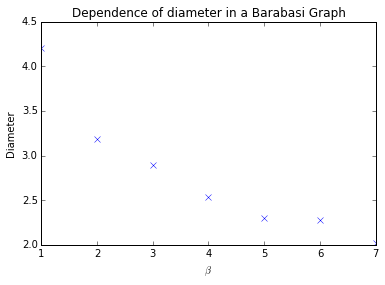

In [657]:
%%time
nnodes = 8
x = range(1,nnodes)
ytotal = np.zeros(nnodes-1)
for exp in range(100):
    y = []
    for i in range(1,nnodes):
        G = create_barabasi(10, i)
        y.append(G.diameter())
    ytotal += y
    
ymean = ytotal/100.
print ymean
    
fig = plt.plot(x, ymean, 'x')
plt.title("Dependence of diameter in a Barabasi Graph")
plt.xlabel(r"$\beta$")
plt.ylabel("Diameter")

In [670]:
x = np.arange(0.6,1,0.1)
ytotal = np.zeros(4)
print len(np.arange(0.1,1,0.1))
for exp in xrange(100):
    y = []
    for p in np.arange(0.6,1,0.1):
        G = create_watts(15, p)
        y.append(G.diameter())
    ytotal += y
    
ymean = ytotal/100.
print ymean
    
fig = plt.plot(x, ymean, 'x')
plt.title("Dependence of diameter in a Watts-Strogartz Graph")
plt.xlabel(r"$\beta$")
plt.ylabel("Diameter")

9


IndexError: list index out of range